# Packages 

In [1]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import helper_functions
from constants_and_classes import *
from load_benchmarks_functionality import (
    load_benchmark_data,
    calc_warm_up_dfs,
    csv_to_df,
)
from plots import *

# Evaluation Graphics Functions

counthigh: 525
7_VM_teastore_home_50k_wires_false.pdf


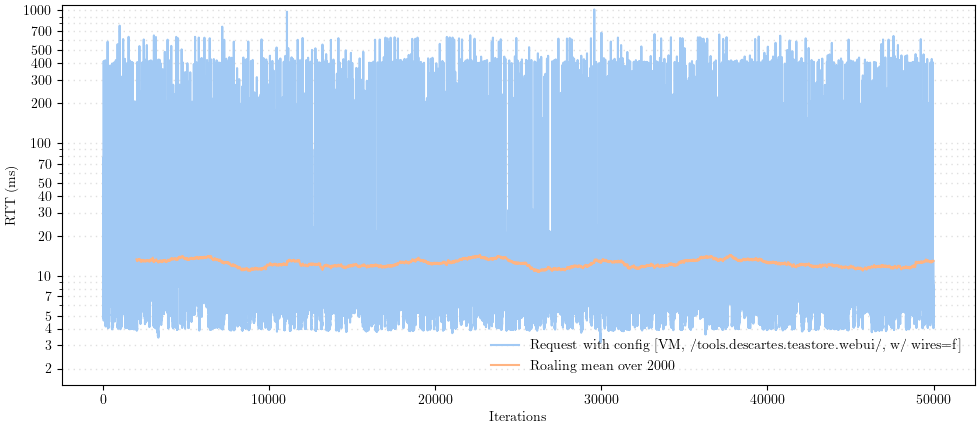

7_VM_teastore_home_50k_without_wires.pdf


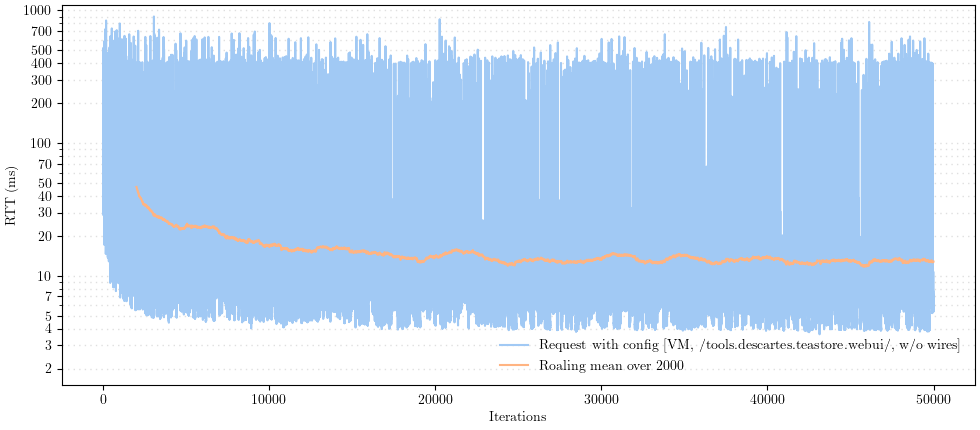

In [4]:
# benchmark_suite_1 - lagplot analyse

# analysis results
# ----  DeceptionState.DEACTIVATED ------
# --> not noticable
#  0 Warmup - {AVG_ADMIN, AWS, DEACTIVATED}

# --------------- AWS ----------------
#  6_000 Warmup - {AVG_ADMIN, AWS, WITHOUT}
#  12_000 Warmup - {AVG_ADMIN, AWS, ACTIVE}

#  10_000-20_000 Warmup - {AVG_HOME, AWS, WITHOUT}
#  10_000-28_000 Warmup - {AVG_HOME, AWS, ACTIVE}

#  20_000 Warmup - {WORST_JAVA, AWS, WITHOUT}
#  18_000 Warmup - {WORST_JAVA, AWS, ACTIVE}

# WORST_PYTHON - not significant noticeable
#  6_000 Warmup - {WORST_PYTHON, AWS, WITHOUT}
#  5_000 Warmup - {WORST_PYTHON, AWS, ACTIVE}

# --------------- VM ----------------
#  ~1_600-15_000 Warmup - {AVG_ADMIN, VM, WITHOUT}
#  ~7_000-14_000 Warmup - {AVG_ADMIN, VM, ACTIVE}
#  ~8_000 Warmup - {WORST_JAVA, VM, WITHOUT}
#  ~8_000-20_000 Warmup - {WORST_JAVA, VM, ACTIVE}

file_wires_true = (
    "../data/benchmark_suite_1/vm/avg-case/benchmark_06-14-18_1694412858194.csv"
)
file_wires_false = (
    "../data/benchmark_suite_1/vm/avg-case/benchmark_06-34-31_1694414071731.csv"
)
file_without_wires = (
    "../data/benchmark_suite_1/vm/avg-case/benchmark_07-01-57_1694415717113.csv"
)

file_name_wires_true = "7_VM_teastore_home_50k_wires_true.pdf"
file_name_wires_false = "7_VM_teastore_home_50k_wires_false.pdf"
file_name_without_wires = "7_VM_teastore_home_50k_without_wires.pdf"

df_wires_true = csv_to_df(file_wires_true)
df_wires_false = csv_to_df(file_wires_false)
df_without_wires = csv_to_df(file_without_wires)

i = 10_000
count_high_values = 0
HIGH_NUMBER_BORDER = 100  # milliseconds
while i < 50_000:
    if df_wires_false.iloc[i, 1] > HIGH_NUMBER_BORDER:
        count_high_values = count_high_values + 1
    i = i + 1
print(f"counthigh: {count_high_values}")

print(file_name_wires_false)
plot_lagplot_generic(
    df_wires_false,
    max_value=50_000,
    show_min=1.5,
    show_max=1100,
    image_name=file_name_wires_false,
    label_name="Request with config [VM, /tools.descartes.teastore.webui/, w/ wires=f]",
)
print(file_name_without_wires)
plot_lagplot_generic(
    df_without_wires,
    max_value=50_000,
    show_min=1.5,
    show_max=1100,
    image_name=file_name_without_wires,
    label_name="Request with config [VM, /tools.descartes.teastore.webui/, w/o wires]",
)

7_VM_teastore_home_200k_wires_false.pdf


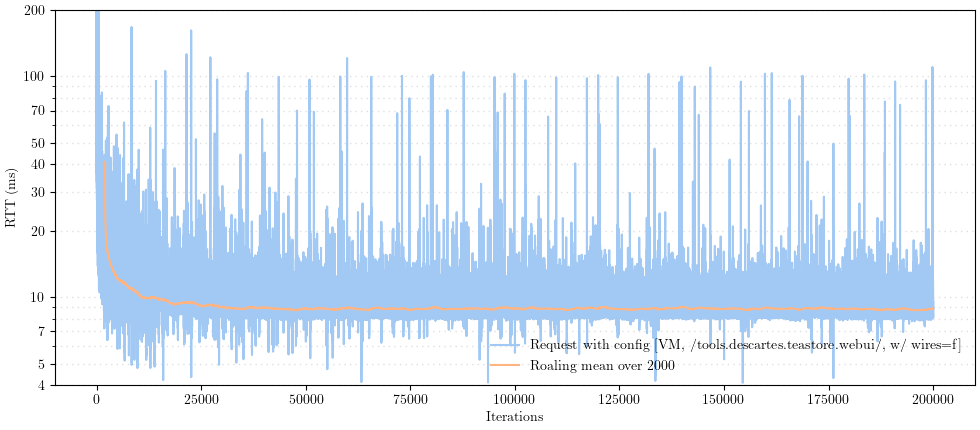

7_VM_teastore_home_200k_without_wires.pdf


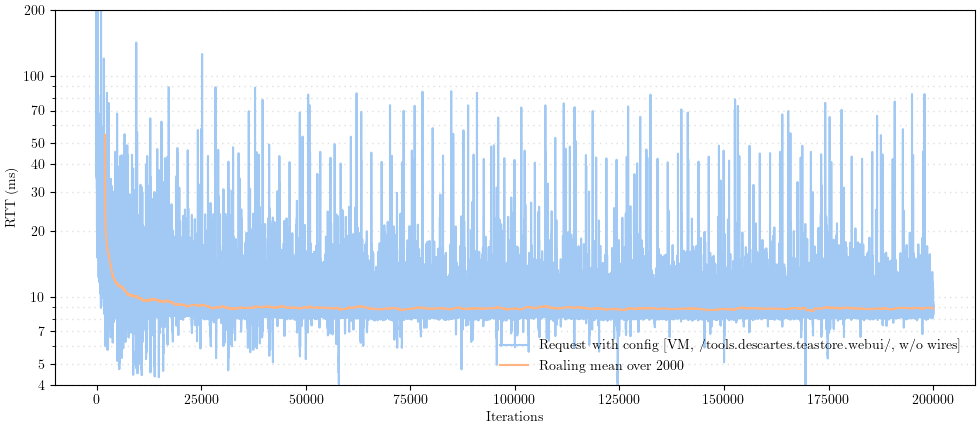

In [7]:
# warmup_analyse - lagplot analyse 200_000 request
file_wires_false = (
    "../data/warmup_analyse/teastore_200k/benchmark_10-57-08_1694775428023.csv"
)
file_without_wires = (
    "../data/warmup_analyse/teastore_200k/benchmark_11-31-17_1694777477326.csv"
)

file_name_wires_false = "7_VM_teastore_home_200k_wires_false.pdf"
file_name_without_wire = "7_VM_teastore_home_200k_without_wires.pdf"

df_wires_false = csv_to_df(file_wires_false)
df_without_wires = csv_to_df(file_without_wires)

print(file_name_wires_false)
plot_lagplot_generic(
    df_wires_false,
    max_value=200_000,
    show_min=4,
    show_max=200,
    image_name="7_VM_teastore_home_200k_wires_false.pdf",
    label_name="Request with config [VM, /tools.descartes.teastore.webui/, w/ wires=f]",
)

print(file_name_without_wire)
plot_lagplot_generic(
    df_without_wires,
    max_value=200_000,
    show_min=4,
    show_max=200,
    image_name="7_VM_teastore_home_200k_without_wires.pdf",
    label_name="Request with config [VM, /tools.descartes.teastore.webui/, w/o wires]",
)

Start loading data...
Filter out warmup...
Data loaded
Print lagplots for SERVER_TYPE = VM:
7_analyse_VM_home_without_wires.pdf


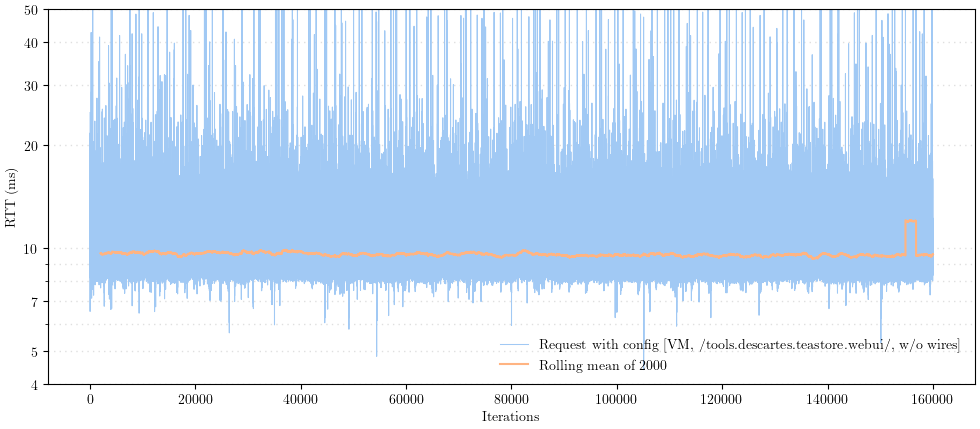

7_analyse_VM_home_with_wires_true.pdf


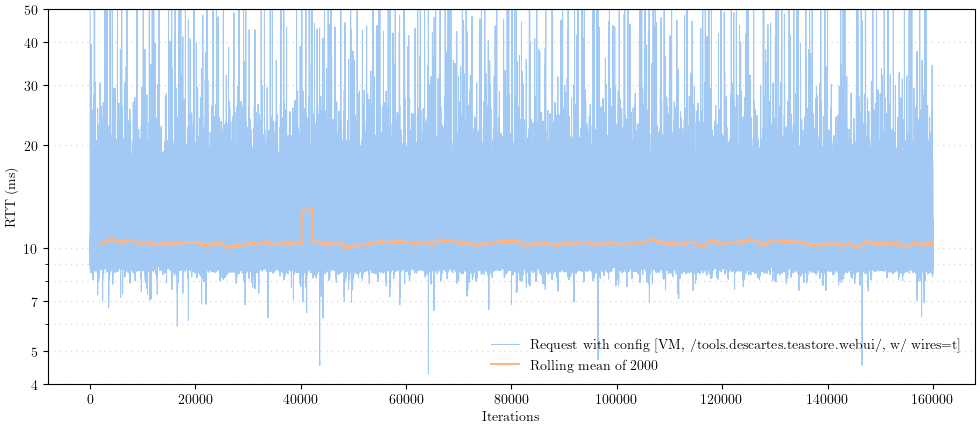

7_analyse_VM_java_with_wires_true.pdf


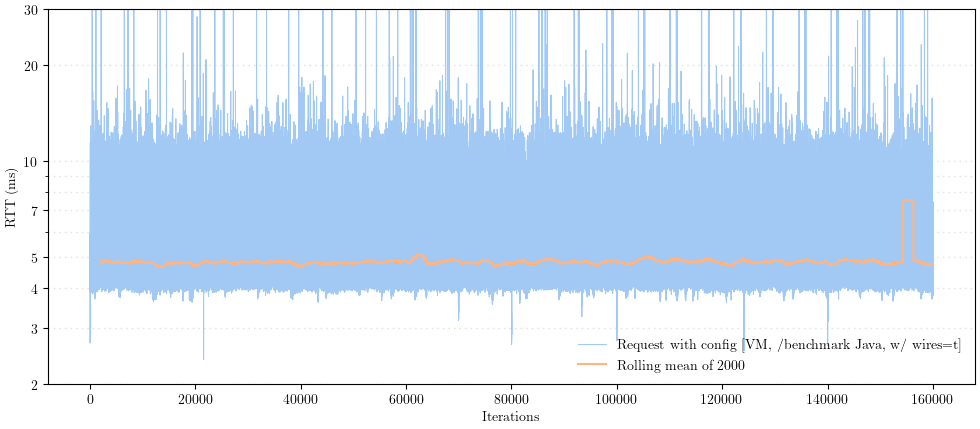

7_analyse_VM_python_with_wires_true.pdf


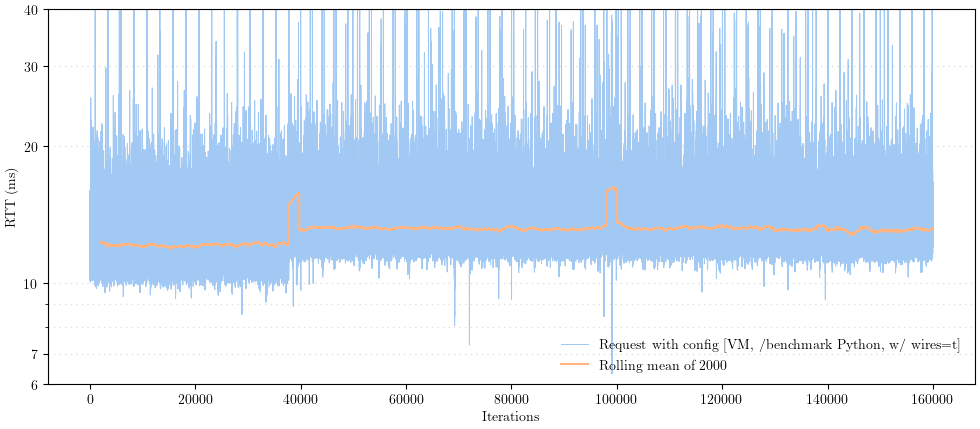

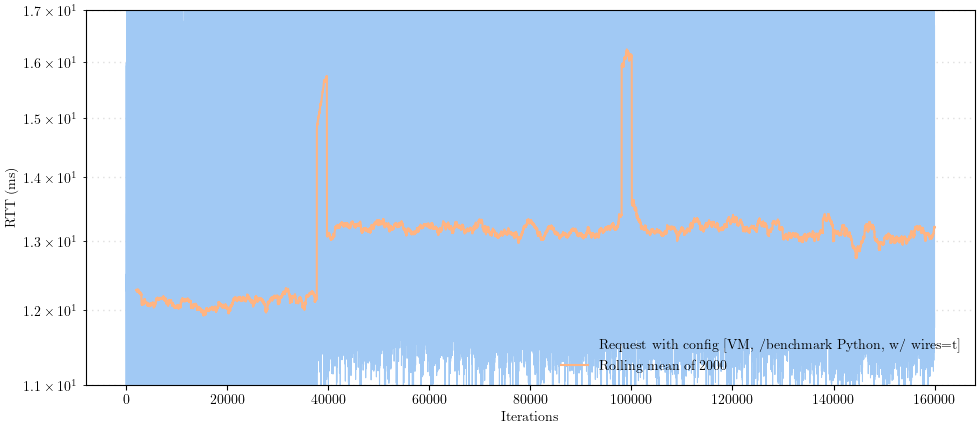

7_analyse_VM_python_without_wires.pdf


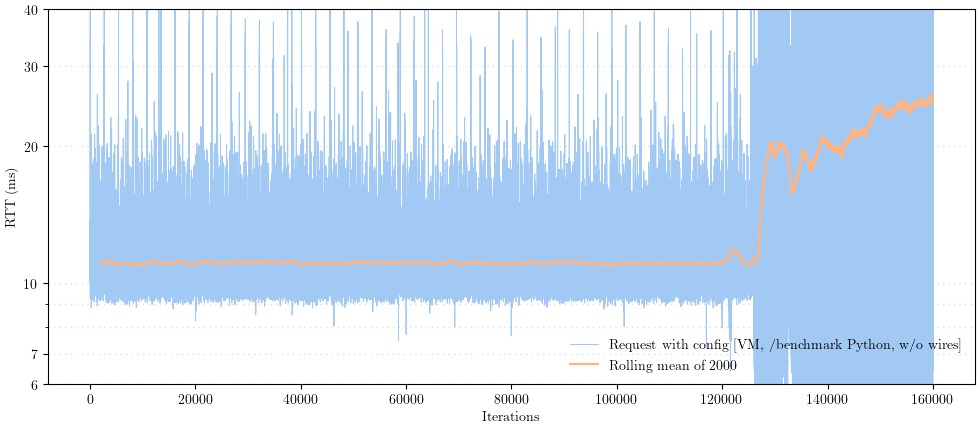

In [8]:
# get plots of csv with max values
ANALYSE_CSV_DIR = "../data/benchmark_suite_2"
ANALYSE_WARM_UP_COUNT = 40_000
ANALYSE_LAGPLOT_LENGTH = 200_000 - ANALYSE_WARM_UP_COUNT
ANALYSE_SERVER_TYPE = ServerType.VM


def print_lagplot_helper(sut: SutSetup.AVG_ADMIN, deception: DeceptionState.WITHOUT):
    name = (
        f"7_analyse_{server_type_name[ANALYSE_SERVER_TYPE.value]}"
        f"_{sut_setup_file_name[sut.value]}"
        f"_{deception_state_file_name[deception.value]}"
        f".pdf"
    )
    print(name)
    plot_lagplots(
        df=analyse_benchmark_suite.panda_warm_up_df,
        filter_sut_setup=sut,
        filter_server_type=ANALYSE_SERVER_TYPE,
        filter_deception_state=deception,
        display_n=ANALYSE_LAGPLOT_LENGTH,
        image_name=name,
    )


print("Start loading data...")
analyse_benchmark_suite = load_benchmark_data(ANALYSE_CSV_DIR)
print("Filter out warmup...")
calc_warm_up_dfs(analyse_benchmark_suite, ANALYSE_WARM_UP_COUNT)
print("Data loaded")

print("Print lagplots for SERVER_TYPE = VM:")
print_lagplot_helper(SutSetup.AVG_HOME, DeceptionState.WITHOUT)
print_lagplot_helper(SutSetup.AVG_HOME, DeceptionState.ACTIVE)
print_lagplot_helper(SutSetup.WORST_JAVA, DeceptionState.ACTIVE)
print_lagplot_helper(SutSetup.WORST_PYTHON, DeceptionState.ACTIVE)
# zoom in into SutSetup.WORST_PYTHON, DeceptionState.ACTIVE
plot_lagplots(
    df=analyse_benchmark_suite.panda_warm_up_df,
    filter_sut_setup=SutSetup.WORST_PYTHON,
    filter_server_type=ANALYSE_SERVER_TYPE,
    filter_deception_state=DeceptionState.ACTIVE,
    display_n=ANALYSE_LAGPLOT_LENGTH,
    show_min=11,
    show_max=17,
)
print_lagplot_helper(SutSetup.WORST_PYTHON, DeceptionState.WITHOUT)

Old test result vs rerun results:


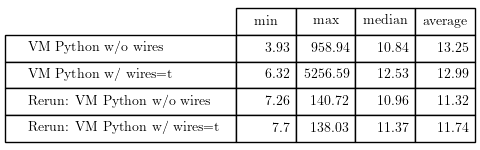

In [11]:
# rerun statistics


def get_statistic(df: pd.DataFrame) -> []:
    assert 40_000 == len(df) or 160_000 == len(df)

    min = round(df["time"].min(), 2)
    max = round(df["time"].max(), 2)
    median = round(df["time"].median(), 2)
    average = round(df["time"].mean(), 2)

    return [min, max, median, average]


# Due to significant performance spikes two benchmark were rerun.
# This table prints the statistic of the old and new benchmarks.
@matplotlib.rc_context(RC_CONTEXT)
def rerun_statistics_comparison(warm_up=40_000, image_name=""):
    print("Old test result vs rerun results:")
    RERUN_FOLDER = (
        "../data/benchmark_suite_2_with_vm_python_rerun/vm/rerun-vs-original-benchmark/"
    )

    vm_python_without_wires = f"{RERUN_FOLDER}benchmark_14-45-32_1695307532439.csv"
    vm_python_wires_true = f"{RERUN_FOLDER}benchmark_11-22-20_1695295340508.csv"
    vm_python_without_wires_rerun = (
        f"{RERUN_FOLDER}benchmark_14-45-32_rerun_19-04-26_1695755066429.csv"
    )
    vm_python_wires_true_rerun = (
        f"{RERUN_FOLDER}benchmark_11-22-20_rerun_18-22-37_1695752557215.csv"
    )

    df_without = csv_to_df(vm_python_without_wires)[warm_up:]
    df_with_true = csv_to_df(vm_python_wires_true)[warm_up:]
    df_without_rerun = csv_to_df(vm_python_without_wires_rerun)[warm_up:]
    df_with_true_rerun = csv_to_df(vm_python_wires_true_rerun)[warm_up:]

    COLUMN_HEADERS = ["min", "max", "median", "average"]
    row_headers = [
        "VM Python w/o wires",
        "VM Python w/ wires=t",
        "Rerun: VM Python w/o wires",
        "Rerun: VM Python w/ wires=t",
    ]

    statistic_without = get_statistic(df_without)
    statistic_with_true = get_statistic(df_with_true)
    statistic_without_rerun = get_statistic(df_without_rerun)
    statistic_with_true_rerun = get_statistic(df_with_true_rerun)
    data = [
        statistic_without,
        statistic_with_true,
        statistic_without_rerun,
        statistic_with_true_rerun,
    ]

    # Hide axes
    fig = plt.figure(figsize=(5, 1.7))
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.box(on=None)
    table = plt.table(
        cellText=data, rowLabels=row_headers, colLabels=COLUMN_HEADERS, loc="center"
    )
    table.scale(1, 1.5)

    if image_name != "":
        helper_functions.save_plot(image_name, tight=True)

    plt.tight_layout()
    plt.show()


statistic_file_name = "7_statistics_rerun_comparison.pdf"
rerun_statistics_comparison(warm_up=40_000, image_name=statistic_file_name)

# Main

Start loading data...
Filter out warmup...
Data loaded
Statistic outcome of all 24 Benchmarks:


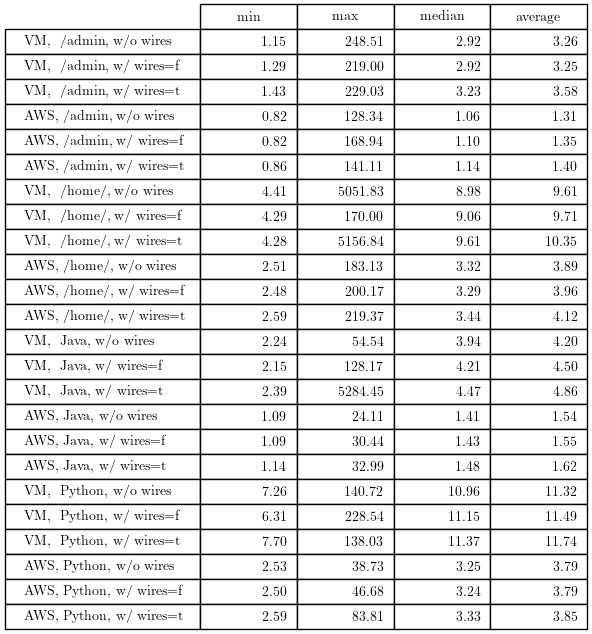

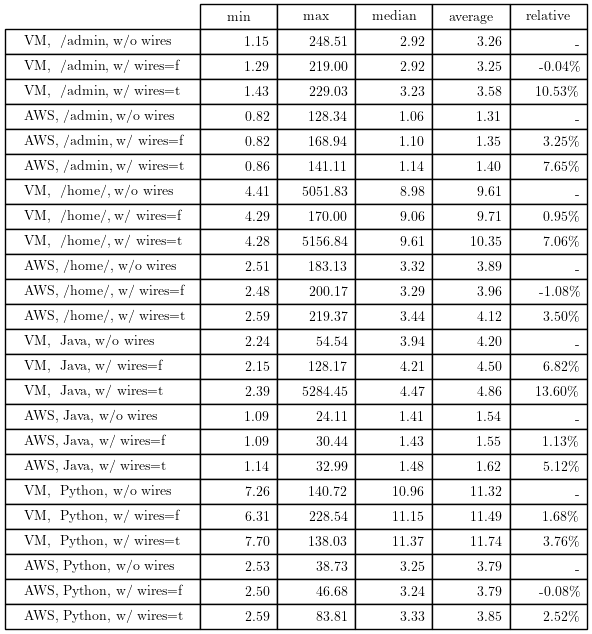

Relative comparison of the w/o wires benchmarks compared to wires=f and wires=t.
Create relative comparison statistic:
... for VM, /admin
... for AWS, /admin
... for VM, /home/
... for AWS, /home/
... for VM, Java
... for AWS, Java
... for VM, Python
... for AWS, Python


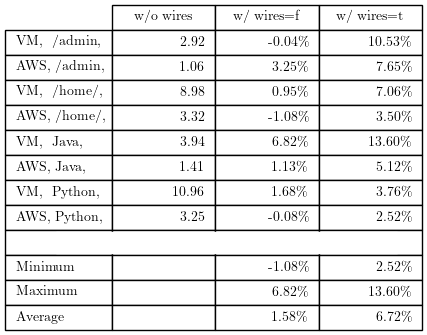

Create relative comparison statistic:
... for VM, /admin
... for AWS, /admin
... for VM, /home/
... for AWS, /home/
... for VM, Java
... for AWS, Java
... for VM, Python
... for AWS, Python


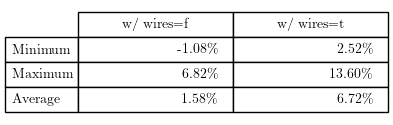

In [2]:
# CSV_DIR = "../data/benchmark_suite_1" # due to a change in the test order, the load_benchmark_data()
#                                         have to be changed before running (see comment inside the function)

# Following files are rerun inside benchmark_suite_2_with_vm_python_rerun contains
# (csv files before rerun are located at ./benchmark_suite_2_with_vm_python_rerun/vm/rerun-vs-original-benchmark):
# - [VM, WORST_PYTHON, ACTIVE], filename: benchmark_11-22-20_rerun_18-22-37_1695752557215.csv
# - [VM, WORST_PYTHON, WITHOUT], filename: benchmark_14-45-32_rerun_19-04-26_1695755066429.csv

CSV_DIR = "../data/benchmark_suite_2_with_vm_python_rerun"
WARM_UP_COUNT = 40_000

LAGPLOT_DISPLAY_LENGTH = 200_000
LAGPLOT_SERVER_TYPE = ServerType.VM
LAGPLOT_SUT_SETUP = SutSetup.WORST_JAVA
LAGPLOT_DECEPTION_STATE = DeceptionState.WITHOUT

LOAD_BENCHMARK_DATA = True
PRINT_STATISTIC = True
PRINT_BOXPLOTS = False
PRINT_LAGPLOT = False

if LOAD_BENCHMARK_DATA:
    print("Start loading data...")
    benchmark_suite = load_benchmark_data(CSV_DIR)
    print("Filter out warmup...")
    calc_warm_up_dfs(benchmark_suite, WARM_UP_COUNT)
    print("Data loaded")

if PRINT_STATISTIC:
    print(f"Statistic outcome of all 24 Benchmarks:")
    plot_stable_statistic(
        benchmark_suite.panda_warm_up_df, image_name="7_statistics.pdf"
    )
    plot_stable_statistic_v2(
        benchmark_suite.panda_warm_up_df, image_name="7_statistics_v2.pdf"
    )

    print(
        f"Relative comparison of the w/o wires benchmarks compared to wires=f and wires=t."
    )
    plot_relative_comparison_statistic(
        benchmark_suite.panda_warm_up_df, image_name="7_statistics_relative.pdf"
    )
    plot_relative_comparison_statistic_v2(
        benchmark_suite.panda_warm_up_df, image_name="7_statistics_relative_v2.pdf"
    )

if PRINT_BOXPLOTS:
    print(
        f"Boxplot {sut_setup_name[SutSetup.AVG_ADMIN.value]} combined with "
        f"{sut_setup_name[SutSetup.AVG_HOME.value]}:"
    )
    plot_boxplots_avg_case(
        benchmark_suite.teastore_warm_up_df,
        image_name="7_boxplot_avg_case.pdf",
        sut_hue=benchmark_suite.testore_warm_hue,
    )

    print(f"Boxplot {sut_setup_name[SutSetup.WORST_PYTHON.value]}:")
    plot_boxplots_worst_case(
        benchmark_suite.python_warm_up_df, image_name="7_boxplot_worst_python.pdf"
    )

    print(f"Boxplot {sut_setup_name[SutSetup.WORST_JAVA.value]}:")
    plot_boxplots_worst_case(
        benchmark_suite.java_warm_up_df, image_name="7_boxplot_worst_java.pdf"
    )


if PRINT_LAGPLOT:
    print(
        f"Lagplot of first {LAGPLOT_DISPLAY_LENGTH} data entries of dataset {{"
        f"server type={server_type_name[LAGPLOT_SERVER_TYPE.value]}; "
        f"sut setup={sut_setup_name[LAGPLOT_SUT_SETUP.value]}; "
        f"Honeywires={deception_state_name[LAGPLOT_DECEPTION_STATE.value]}}}"
    )
    plot_lagplots(
        benchmark_suite.panda_df,
        LAGPLOT_SUT_SETUP,
        LAGPLOT_SERVER_TYPE,
        LAGPLOT_DECEPTION_STATE,
        LAGPLOT_DISPLAY_LENGTH,
    )